In [91]:
import pandas as pd

# Load the Excel file
excel_path = "data/data.xlsx"
xls = pd.ExcelFile(excel_path)

# Load the data from the sheet 'Sayfa1'
df = xls.parse('Sayfa1')

In [92]:
print(df.columns)

Index(['Patient number', 'Gender', 'Age', 'BMI', 'ASA score (1-2-3-4)',
       'Smoking history', 'Smoking continiuanion', 'Antiaggregant use', 'NEU',
       'LYMP', 'NLR', 'Macroscopic hematuria', 'VİRADS score', 'Tumor size',
       'Tumor count ', 'Tumor morphology', 'Tumor location',
       'Bladder neck involvement', 'Additional cystoscopic findings',
       'Pathology grade', 'Detrussor presence', 'Nüks ', 'Nüks zamanı (Ay)',
       'tm sayı', 'yerleşimi', 'mesane boynu', 'boyut', 'Nüks patoloji',
       'Kas var mı', 'Unnamed: 29'],
      dtype='object')


In [93]:
excluded_columns = [
    'Patient number',
    'NEU', 
    'LYMP',
    #'Ek hastalık',  
    #'Obturator', 
    'Nüks zamanı (Ay)', 
    'tm sayı', 
    'yerleşimi', 
    'mesane boynu', 
    'boyut', 
    'Nüks patoloji', 
    'Kas var mı',
    'Unnamed',
]

df = df.drop(df.columns[[-1]], axis=1)  # Drop the last
df = df[[col for col in df.columns if col not in excluded_columns]]
df.rename(columns={'Nüks ': 'Nüks'}, inplace=True)

# Display the first few rows of the dataframe
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           184 non-null    float64
 1   Age                              184 non-null    float64
 2   BMI                              184 non-null    float64
 3   ASA score (1-2-3-4)              184 non-null    float64
 4   Smoking history                  184 non-null    float64
 5   Smoking continiuanion            184 non-null    float64
 6   Antiaggregant use                184 non-null    float64
 7   NLR                              184 non-null    float64
 8   Macroscopic hematuria            184 non-null    float64
 9   VİRADS score                     184 non-null    float64
 10  Tumor size                       184 non-null    float64
 11  Tumor count                      184 non-null    float64
 12  Tumor morphology      

,Gender,Age,BMI,ASA score (1-2-3-4),Smoking history,Smoking continiuanion,Antiaggregant use,NLR,Macroscopic hematuria,VİRADS score,Tumor size,Tumor count,Tumor morphology,Tumor location,Bladder neck involvement,Additional cystoscopic findings,Pathology grade,Detrussor presence,Nüks
0,0.0,72.0,26.0,3.0,1.0,0.0,1.0,3.216730,1.0,1.0,10.0,2.0,1.0,7.0,0.0,0.0,0,1.0,0.0
1,0.0,71.0,25.0,3.0,1.0,0.0,1.0,3.313492,1.0,1.0,11.0,2.0,1.0,7.0,0.0,0.0,0,1.0,0.0
2,0.0,71.0,33.0,3.0,0.0,0.0,0.0,2.519608,1.0,2.0,31.0,4.0,3.0,7.0,1.0,0.0,1,1.0,0.0
3,0.0,72.0,34.0,3.0,0.0,0.0,0.0,2.437209,1.0,2.0,30.0,4.0,3.0,7.0,1.0,0.0,1,1.0,0.0
4,0.0,79.0,28.0,3.0,0.0,0.0,1.0,1.834025,1.0,2.0,17.0,1.0,1.0,3.0,0.0,2.0,0,0.0,0.0


In [94]:
df.describe()

,Gender,Age,BMI,ASA score (1-2-3-4),Smoking history,Smoking continiuanion,Antiaggregant use,NLR,Macroscopic hematuria,VİRADS score,Tumor size,Tumor count,Tumor morphology,Tumor location,Bladder neck involvement,Additional cystoscopic findings,Pathology grade,Detrussor presence,Nüks
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,185.000000,184.000000,184.000000
mean,0.315217,62.940217,26.708261,2.472826,0.711957,0.255435,0.380435,2.226956,0.777174,1.945652,22.543478,1.608696,1.782609,3.880435,0.130435,0.353261,0.118919,0.527174,0.418478
std,0.465870,10.282444,3.698134,0.500623,0.454087,0.437295,0.486818,0.944699,0.417278,0.766286,10.542563,1.080948,1.143536,1.809763,0.337700,0.761211,0.324571,0.500623,0.494655
min,0.000000,37.000000,18.800000,2.000000,0.000000,0.000000,0.000000,0.479482,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,56.000000,24.175000,2.000000,0.000000,0.000000,0.000000,1.615589,1.000000,2.000000,15.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,63.500000,26.160000,2.000000,1.000000,0.000000,0.000000,1.997630,1.000000,2.000000,21.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,71.000000,28.747500,3.000000,1.000000,1.000000,1.000000,2.542017,1.000000,2.000000,30.000000,2.000000,3.000000,4.250000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,84.000000,37.500000,3.000000,1.000000,1.000000,1.000000,4.926380,1.000000,4.000000,58.000000,5.000000,5.000000,7.000000,1.000000,4.000000,1.000000,1.000000,1.000000


Accuracy: 0.6785714285714286
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.70      0.72        33
         1.0       0.60      0.65      0.62        23

    accuracy                           0.68        56
   macro avg       0.67      0.67      0.67        56
weighted avg       0.68      0.68      0.68        56



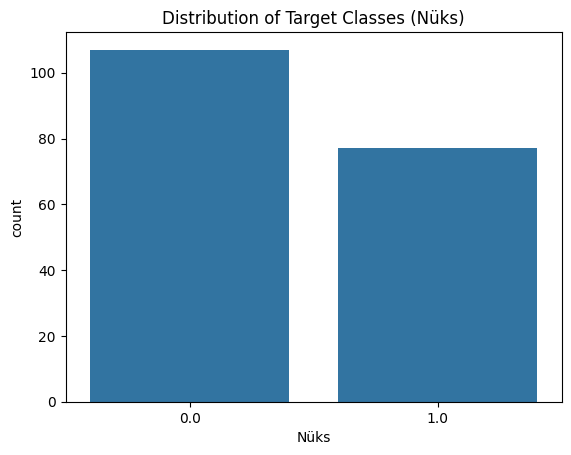

In [97]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing target
df_clean = df.dropna(subset=['Nüks'])

# Drop potentially problematic columns
# For example, drop 'Patoloji' or 'Kas var mı.1' if they are suspected to leak info
df_clean = df_clean.drop(columns=['Kas var mı.1', 'Patoloji'], errors='ignore')

# Separate features and target
X = df_clean.drop(columns=['Nüks'])
y = df_clean['Nüks']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Try Logistic Regression first
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize class distribution
sns.countplot(x=y)
plt.title("Distribution of Target Classes (Nüks)")
plt.show()

In [102]:
# Re-run the previous block since the kernel reset cleared variables
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix
)
from sklearn.model_selection import train_test_split
import pandas as pd

# Prepare the cleaned dataset again
df_model = df.dropna(subset=['Nüks'])  # Drop missing target rows
df_model = df_model.drop(columns=['Kas var mı.1', 'Patoloji'], errors='ignore')  # Potential leakage

# Extract features and target
X = df_model.drop(columns=['Nüks'])
y = df_model['Nüks']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Dictionary to store results
results = {}

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]
rf_cm = confusion_matrix(y_test, rf_pred)
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, rf_pred),
    'sensitivity': rf_cm[1, 1] / (rf_cm[1, 0] + rf_cm[1, 1]),
    'specificity': rf_cm[0, 0] / (rf_cm[0, 0] + rf_cm[0, 1]),
    'auc': roc_auc_score(y_test, rf_proba),
}

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)[:, 1]
lr_cm = confusion_matrix(y_test, lr_pred)
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, lr_pred),
    'sensitivity': lr_cm[1, 1] / (lr_cm[1, 0] + lr_cm[1, 1]),
    'specificity': lr_cm[0, 0] / (lr_cm[0, 0] + lr_cm[0, 1]),
    'auc': roc_auc_score(y_test, lr_proba),
}

# K Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)[:, 1]
knn_cm = confusion_matrix(y_test, knn_pred)
results['K Nearest Neighbors'] = {
    'accuracy': accuracy_score(y_test, knn_pred),
    'sensitivity': knn_cm[1, 1] / (knn_cm[1, 0] + knn_cm[1, 1]),
    'specificity': knn_cm[0, 0] / (knn_cm[0, 0] + knn_cm[0, 1]),
    'auc': roc_auc_score(y_test, knn_proba),
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(results).T
comparison_df.reset_index(inplace=True)
comparison_df.rename(columns={'index': 'Model'}, inplace=True)
comparison_df

,Model,accuracy,sensitivity,specificity,auc
0,Random Forest,0.673913,0.578947,0.740741,0.835283
1,Logistic Regression,0.673913,0.631579,0.703704,0.715400
2,K Nearest Neighbors,0.717391,0.736842,0.703704,0.764133


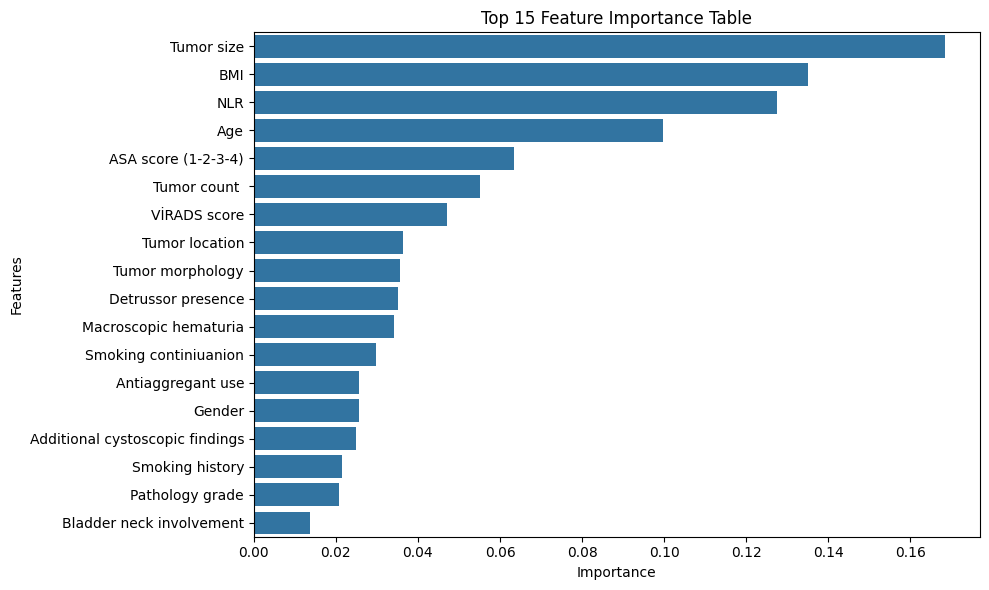

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare data
df_model = df.dropna(subset=['Nüks']).drop(columns=['Kas var mı.1', 'Patoloji'], errors='ignore')
X = pd.get_dummies(df_model.drop(columns=['Nüks']), drop_first=True)
y = df_model['Nüks']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# 1. Random Forest Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances.values, y=rf_importances.index)
plt.title("Top 15 Feature Importance Table")
plt.ylabel("Features")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [104]:
import json

top_20_importances = rf_importances.head(20).to_dict()

# Suppose `top_20_importances` is your dictionary of features and their importances
top_20_rounded = {k: round(v, 4) for k, v in top_20_importances.items()}

# Print as JSON-formatted string
print(json.dumps(top_20_rounded, indent=4))

{
    "Tumor size": 0.1685,
    "BMI": 0.1352,
    "NLR": 0.1276,
    "Age": 0.0997,
    "ASA score (1-2-3-4)": 0.0634,
    "Tumor count ": 0.055,
    "V\u0130RADS score": 0.0472,
    "Tumor location": 0.0364,
    "Tumor morphology": 0.0357,
    "Detrussor presence": 0.035,
    "Macroscopic hematuria": 0.0343,
    "Smoking continiuanion": 0.0298,
    "Antiaggregant use": 0.0257,
    "Gender": 0.0255,
    "Additional cystoscopic findings": 0.0249,
    "Smoking history": 0.0216,
    "Pathology grade": 0.0207,
    "Bladder neck involvement": 0.0138
}


In [106]:
# Convert dictionary to DataFrame
df_importances = pd.DataFrame(list(top_20_rounded.items()), columns=['Feature', 'Importance'])

# Save to Excel
df_importances.to_excel('data/feature_importance.xlsx', index=False)